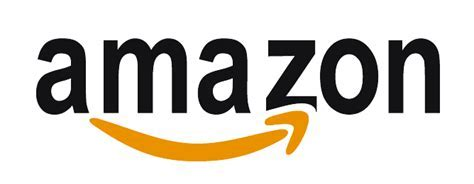

# <span style="color: cyan;">Amazon Sales Analysis </span>

## <span style="color: cyan;">🔖Objective </span>

The primary objective of this project is to analyze Amazon sales data to uncover insights and trends that can drive strategic decision-making. The analysis will focus on understanding sales performance across different regions, countries, and item types, as well as evaluating the impact of various factors such as sales channels, order priority, and shipping times on overall sales, revenue, costs, and profit.

## <span style="color: cyan;">🔖Data Overview </span>

**The dataset comprises several key features, each contributing to a comprehensive view of Amazon's sales operations. Below is a description of each feature:**



- **Region**: The geographical region where the sale occurred.
- **Country**: The specific country within the region where the order was placed.
- **Item Type**: The category of the item sold (e.g., electronics, clothing, etc.).
- **Sales Channel**: The medium through which the sale was made (e.g., online, offline).
- **Order Priority**: The priority level of the order (e.g., high, medium, critical, low).
- **Order Date**: The date when the order was placed.
- **Order ID**: A unique identifier for the order.
- **Ship Date**: The date when the order was shipped.
- **Units Sold**: The number of units sold in the order.
- **Unit Price**: The price per unit of the item sold.
- **Unit Cost**: The cost per unit of the item sold.
- **Total Revenue**: The total revenue generated from the order (calculated as Units Sold * Unit Price).
- **Total Cost**: The total cost incurred for the order (calculated as Units Sold * Unit Cost).
- **Total Profit**: The total profit earned from the order (calculated as Total Revenue - Total Cost). 

## <span style="color: cyan;">🔖Import Libraries </span>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

## <span style="color: cyan;">🔖Exploring the Dataset </span>

In [14]:
df=pd.read_csv("Amazon Sales data.csv")

In [15]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [16]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


> ***Note*** - The Dataset contains 100 records with 5 Categorical variables and 6 Numerical variables with "Order Date" & "Ship Date" likely represents the Dates.

In [18]:
round(df.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Order ID,100.0,555020412.4,260615257.1,114606559.0,338922488.0,557708561.0,790755080.8,994022214.0
Units Sold,100.0,5128.7,2794.5,124.0,2836.2,5382.5,7369.0,9925.0
Unit Price,100.0,276.8,235.6,9.3,81.7,179.9,437.2,668.3
Unit Cost,100.0,191.0,188.2,6.9,35.8,107.3,263.3,525.0
Total Revenue,100.0,1373487.7,1460028.7,4870.3,268721.2,752314.4,2212044.7,5997055.0
Total Cost,100.0,931805.7,1083938.3,3612.2,168868.0,363566.4,1613869.7,4509794.0
Total Profit,100.0,441682.0,438537.9,1258.0,121443.6,290768.0,635828.8,1719922.0


In [19]:
df.describe(include='object').T

,count,unique,top,freq
Region,100,7,Sub-Saharan Africa,36
Country,100,76,The Gambia,4
Item Type,100,12,Clothes,13
Sales Channel,100,2,Offline,50
Order Priority,100,4,H,30
Order Date,100,100,5/28/2010,1
Ship Date,100,99,11/17/2010,2


In [20]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64